In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

In [67]:
df = pd.read_csv("D:/Self Projects/bengaluru house price/archive/Bengaluru_House_Data.csv")

In [68]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [69]:
df.shape

(13320, 9)

In [70]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [71]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [72]:
df = df.drop(['availability', 'society', 'balcony'], axis=1)
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [73]:
df = df.dropna()
df.shape

(13246, 6)

In [74]:
df.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [75]:
df['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [76]:
df['BHK'] = df['size'].apply(lambda x: x.split(' ')[0])

In [77]:
df.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [78]:
df = df.drop(['size'],axis=1)

In [79]:
df.dtypes

area_type      object
location       object
total_sqft     object
bath          float64
price         float64
BHK            object
dtype: object

In [80]:
df['BHK']=df['BHK'].astype('float64')

In [81]:
df.dtypes

area_type      object
location       object
total_sqft     object
bath          float64
price         float64
BHK           float64
dtype: object

In [82]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [83]:
df[~df['total_sqft'].apply(is_float)]

,area_type,location,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4.0
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4.0
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2.0
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2.0
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2.0
...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,38.190,2.0
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,122.000,3.0
13059,Super built-up Area,Harlur,1200 - 1470,2.0,72.760,2.0
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,59.135,2.0


In [84]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [85]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)
df.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                  2475.0
bath                           4.0
price                        186.0
BHK                            4.0
Name: 30, dtype: object

In [86]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [87]:
df.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [95]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [96]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [100]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [98]:
df['location'] = df['location'].apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)

In [102]:
df[df['total_sqft']/df['BHK']<300]

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,Other,1020.0,6.0,370.0,6.0,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
68,Plot Area,Other,1350.0,7.0,85.0,8.0,6296.296296
70,Plot Area,Other,500.0,3.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...
13277,Plot Area,Other,1400.0,7.0,218.0,7.0,15571.428571
13279,Plot Area,Other,1200.0,5.0,130.0,6.0,10833.333333
13281,Plot Area,Margondanahalli,1375.0,5.0,125.0,5.0,9090.909091
13303,Plot Area,Vidyaranyapura,774.0,5.0,70.0,5.0,9043.927649


In [103]:
df = df[~(df['total_sqft']/df['BHK']<300)]
df.shape

(12502, 7)

In [104]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [107]:
m = df['price_per_sqft'].mean()
s = df['price_per_sqft'].std()

df = df[(df['price_per_sqft']<(m+s)) & (df['price_per_sqft']>(m-s))]
df.shape

(11294, 7)

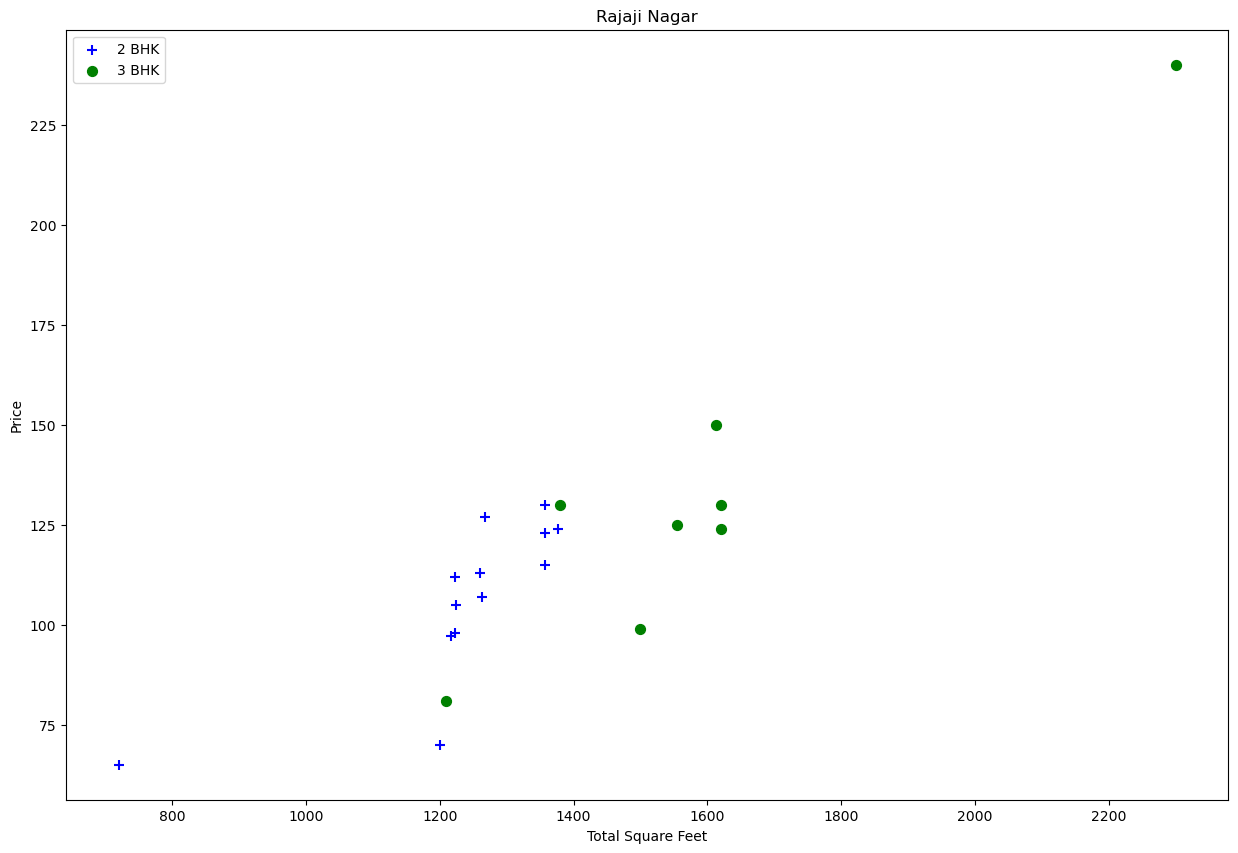

In [116]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', marker='+', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50)
    plt.title(location)
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price')
    plt.legend()
    
plot_scatter_chart(df,'Rajaji Nagar') 

In [126]:
def bhkoutliers(df):
    bhk_stats = df.groupby(["location", "BHK"])["price_per_sqft"].agg(["mean", "count"]).rename(columns={"mean": "mean_price", "count": "count"})
    merged_df = df.merge(bhk_stats, left_on=["location", "BHK"], right_index=True, how="left")
    outliers = merged_df[(merged_df["BHK"] == 2) & (merged_df["mean_price"] < merged_df["price_per_sqft"])].index
    return df.drop(outliers)

df = bhkoutliers(df)
df.shape

(8886, 7)

(array([ 449., 1463., 2079., 1687., 1088.,  811.,  556.,  360.,  202.,
         191.]),
 array([ 2149.27706135,  2981.96840284,  3814.65974432,  4647.3510858 ,
         5480.04242729,  6312.73376877,  7145.42511026,  7978.11645174,
         8810.80779322,  9643.49913471, 10476.19047619]),
 <BarContainer object of 10 artists>)

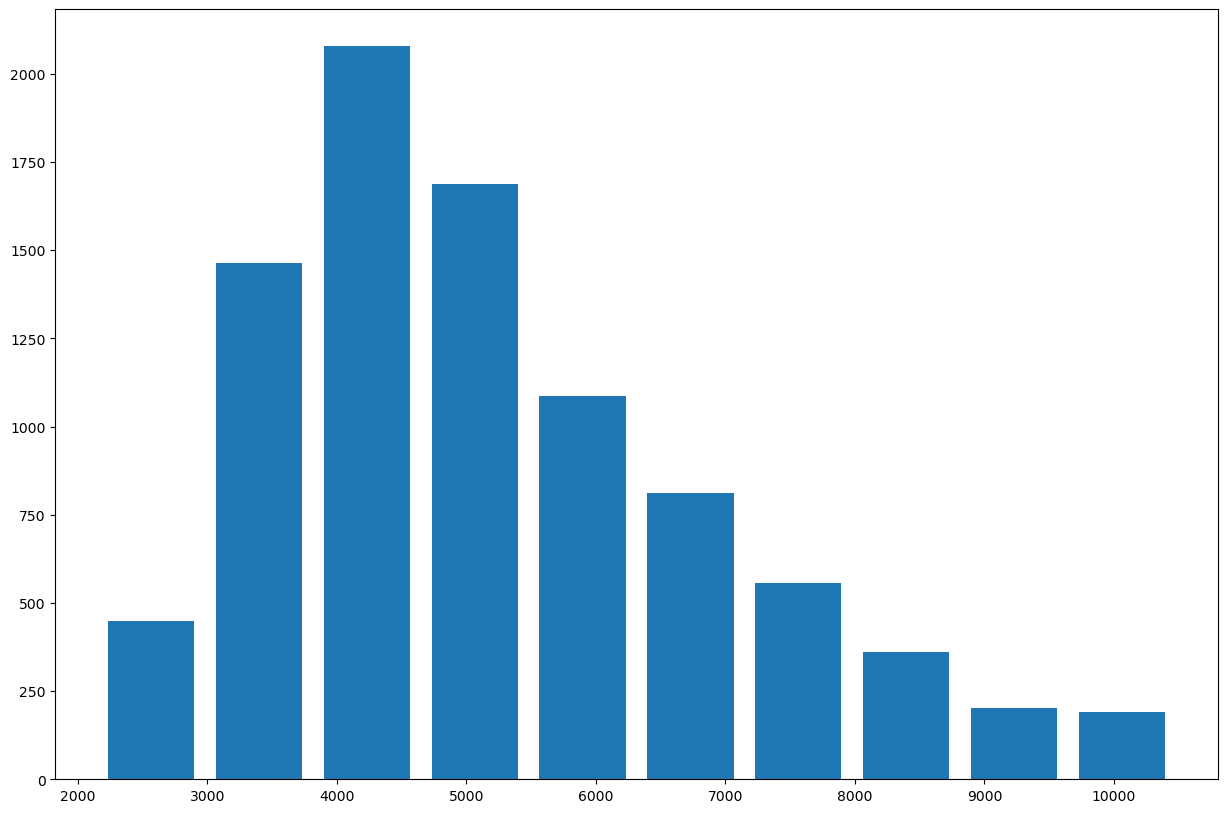

In [127]:
plt.hist(df.price_per_sqft, rwidth=0.8)

In [130]:
df.groupby('bath')['price'].agg('mean')

bath
1.0      35.373676
2.0      54.722829
3.0     104.419272
4.0     189.084246
5.0     219.418307
6.0     223.146552
7.0     193.882353
8.0     192.105263
9.0     277.100000
10.0    165.000000
12.0    278.333333
13.0    275.000000
16.0    550.000000
Name: price, dtype: float64

In [133]:
df.location.nunique()

252

In [135]:
le = LabelEncoder()
df['location'] = le.fit_transform(df.location)
df['area_type'] = le.fit_transform(df.area_type)

df.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
1,2,64,2600.0,5.0,120.0,4.0,4615.384615
2,0,237,1440.0,2.0,62.0,3.0,4305.555556
3,3,166,1521.0,3.0,95.0,3.0,6245.890861
4,3,158,1200.0,2.0,51.0,2.0,4250.000000
5,3,246,1170.0,2.0,38.0,2.0,3247.863248


In [137]:
x = df.drop(['price','price_per_sqft'], axis = 'columns')
y = df.price

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [142]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
lr_reg.score(X_test,y_test)

0.7916065534859441

In [146]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.79160655, 0.83152334, 0.79458358, 0.78465311, 0.8213676 ])

In [164]:
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model(x, y):
    algo = {
        'ridge_regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
            }
        },
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'Model': algo_name,
            'Best Score': gs.best_score_,
            'Best Params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['Model', 'Best Score', 'Best Params'])


result_df = find_best_model(x, y)

C:\Users\himan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\base.py", line 

In [165]:
find_best_model(x,y)

C:\Users\himan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\himan\anaconda3\lib\site-packages\sklearn\base.py", line 

,Model,Best Score,Best Params
0,ridge_regression,0.820786,{'alpha': 0.1}
1,linear_regression,0.820786,{}
2,lasso,0.817936,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.750502,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [168]:
y_pred=lr_reg.predict(X_test)

In [169]:
pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

,Predicted,Actual
13082,44.996136,49.50
2812,27.405403,41.00
7469,104.486844,70.00
1202,183.523597,220.00
10362,240.836464,320.00
...,...,...
7687,47.045374,40.08
8766,62.151807,65.00
7585,43.496210,32.00
1631,100.747366,125.00


In [170]:
x.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'BHK'], dtype='object')

In [ ]:
with open('bangalore_house_price_prediction', 'wb') as f:
    pickle.dump(lr_reg,f)

In [188]:
import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open('columns.json', "w") as f:
    f.write(json.dumps(columns))